In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
#os.chdir('C:\\Users\\gbulgach\\Desktop\\Curso Data Science\\desafio_final')

---

# Desafio final Digital House
Grupo 3

Alumnos: Gustavo Bulgach, Ronny Gomez y Miriam Lanabere

##### OBJETIVO: El desafío consiste en utilizar un dataset de Recursos Humanos de una compañía de telecomunicaciones con el objetivo de predecir la baja de un colaborador.
##### El dataset cuenta con los empleados activos de la empresa y las bajas voluntarias e involuntarias de los años 2018, 2019 y 2020. Consta de 1.649.196 registros sobre una poblacion de 23.266 personas.


<a id="section_indice"></a> 
## Indice

[1- Limpieza del dataset](#section_limpieza)

[2- Análisis exploratorio del dataset](#section_EDA)



### Limpieza del dataset

<a id="section_limpieza"></a> 
[volver a Indice](#section_indice)

In [5]:
df = pd.read_csv('dataset_bajas.csv', encoding = 'latin1', sep = ';', low_memory = False)

In [6]:
df.head(4)

,REGION_GESTIONAL,BAJA_NUM,AREA_DE_NEGOCIO,AREA_GESTIONAL,AREA DE NEGOCIO 2,Id_Soc,Posición,Categ,Repr_Gremial,REPRE_GREMIAL II,Clase_de_Contrato,Mes,Año,Fecha_Antig,Antig_Recon,Fecha_Nacim,edad,sexo,Unidad_Organizativa,ENCUADRE,GENERACIÓN,GENERACION_O,GRUPO JERARQUICO,GRUPO JERARQUICO_O,nacionalidad,estado_civil,puesto_sindical,htrab,Gr.prof,gerencia_operativa,PAIS_SOC,DIRECCION,EMPLEADO CON HIJOS Q,COMPA RATIO BAJAS,COMPA RATIO,COMPA RATIO ABD,TIPO BAJA,PERFIL DIGITAL,Función,Categoría del puesto,Agrupador Categorá del puesto,Grupo de personal,Horas laborables semanales,Superior directo_legajo,Superior directo_q reportes,Home_Partido,Home_Provincia,Home_Pais,Laboral_Localidad,Laboral_Provincia,Laboral_Pais,Tipo de estructura,COLABORADORES,LIDERES,nivel_estudios_alcanzado,mensajes_yammer,hijos_menos_cinco,hijos_entre_seis_diez,hijos_entre_once_quince,hijos_entre_dieciseis_veinte,hijos_mas_veinte
0,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Atención Presencial Atención Comercial,PC,Dentro de convenio,FATEL,Regular,6,2020,"2001-02-16 00:00:00,000",19.0,"1974-12-05 00:00:00,000",45.0,Femenino,ROSARIO ROCA 2,DENTRO DE CONVENIO,Generación X,2,COLABORADOR,1,argentina,divorciado/a,NaN,84,SITR. M,Region Litoral,ARGENTINA,COO,1.0,NaN,NaN,NaN,NaN,NaN,Atención Presencial,Atención Comercial,Ventas y Atención al Cliente,CONTRIBUIDOR INDIVIDUAL,20.0,527639.0,11,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fé,Argentina,Area de Negocio,1,0,3.0,3,1,0,0,0,0
1,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Supervisor/a ROSARIO ROCA 3,F5,Dentro de convenio,FOPSSTA,Regular,6,2020,"2003-11-01 00:00:00,000",16.0,"1978-07-17 00:00:00,000",41.0,Femenino,ROSARIO ROCA 3,DENTRO DE CONVENIO,Generación X,2,GESTIÓN,2,argentina,casado/a,NaN,160,FOPST. M,Region Litoral,ARGENTINA,COO,2.0,NaN,NaN,NaN,NaN,NaN,Supervisor/a,Estructura Operativa,Estructura Operativa,LIDER DE EQUIPO,40.0,201122.0,6,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fé,Argentina,Area de Negocio,0,1,3.0,1,0,2,0,0,2
2,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Atención Presencial de Ventas,NC,Dentro de convenio,FATEL,Regular,6,2020,"2001-08-01 00:00:00,000",18.0,"1973-02-15 00:00:00,000",47.0,Femenino,ROSARIO ROCA 3,DENTRO DE CONVENIO,Generación X,2,COLABORADOR,1,argentina,soltero/a,NaN,84,SITR. M,Region Litoral,ARGENTINA,COO,2.0,NaN,NaN,NaN,NaN,NaN,Atención Presencial,Ventas,Ventas y Atención al Cliente,CONTRIBUIDOR INDIVIDUAL,20.0,193030.0,10,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fe,Argentina,Area de Negocio,1,0,2.0,0,0,1,1,0,1
3,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Atención Presencial de Soporte Comercial Oc,PC,Dentro de convenio,FATEL,Regular,6,2020,"2000-09-13 00:00:00,000",19.0,"1975-01-31 00:00:00,000",45.0,Femenino,SUPERVISION 1,DENTRO DE CONVENIO,Generación X,2,COLABORADOR,1,argentina,casado/a,NaN,160,SITR. M,Region Litoral,ARGENTINA,COO,1.0,NaN,NaN,NaN,NaN,NaN,Atención Presencial,Soporte Comercial Oc,Convenios,CONTRIBUIDOR INDIVIDUAL,40.0,193030.0,10,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fé,Argentina,Area Corporativa,1,0,1.0,0,0,0,1,0,0


In [7]:
df.size

1649196

In [23]:
df.shape

(23266, 61)

# AÑO

##### Solo nos quedamos con el año 2020

In [8]:
df_año_mask = df.Año == 2020
df = df[df_año_mask]

In [43]:
df.isnull().sum().sort_values(ascending = False)

puesto_sindical                  23249
COMPA RATIO BAJAS                23172
TIPO BAJA                        22861
PERFIL DIGITAL                   22504
COMPA RATIO                      17799
COMPA RATIO ABD                  17705
nivel_estudios_alcanzado          8749
EMPLEADO CON HIJOS Q              8728
Clase_de_Contrato                  137
Categ                              126
GENERACIÓN                           1
Fecha_Antig                          1
Fecha_Nacim                          1
Unidad_Organizativa                  0
GENERACION_O                         0
GRUPO JERARQUICO                     0
GRUPO JERARQUICO_O                   0
nacionalidad                         0
ENCUADRE                             0
puesto_sindical_ok                   0
sexo                                 0
edad                                 0
Antig_Recon                          0
Año                                  0
Mes                                  0
REPRE_GREMIAL II         

# REGION_GESTIONAL

##### Modificamos los casos de NORTE y les ponemos la region que corresponde segun la provincia laboral

In [9]:
df.REGION_GESTIONAL.value_counts()

AMBA               13693
LITO                4546
MEDI                2897
NOA                 1131
PBA y PATAGONIA      932
NORTE                 67
Name: REGION_GESTIONAL, dtype: int64

In [10]:
df_n_m = df.REGION_GESTIONAL == 'NORTE'
df_n = df[df_n_m]

In [11]:
df_n.BAJA_NUM.value_counts()

1    66
0     1
Name: BAJA_NUM, dtype: int64

In [12]:
df_n.Laboral_Provincia.value_counts()

Córdoba     56
La Pampa     4
Salta        3
Tucumán      2
La Rioja     1
Mendoza      1
Name: Laboral_Provincia, dtype: int64

In [13]:

df.loc[(df['Laboral_Provincia'] == 'Córdoba') | (df['Laboral_Provincia'] == 'La Pampa') | (df['Laboral_Provincia'] == 'Mendoza'), 'REGION_GESTIONAL'] = 'MEDI'
df.loc[(df['Laboral_Provincia'] == 'Tucumán') | (df['Laboral_Provincia'] == 'Salta') | (df['Laboral_Provincia'] == 'La Rioja'), 'REGION_GESTIONAL'] = 'NOA'

In [14]:
df.REGION_GESTIONAL.value_counts()

AMBA               13693
LITO                4546
MEDI                2958
NOA                 1137
PBA y PATAGONIA      932
Name: REGION_GESTIONAL, dtype: int64

# HTRAB

##### Modificamos los casos outliers que tenian mal la coma

In [15]:
df.htrab = pd.to_numeric(df.htrab, errors='coerce')

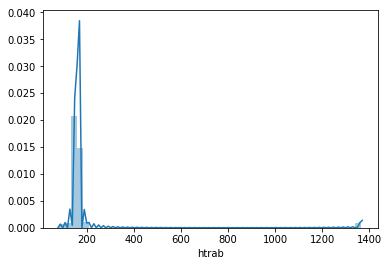

In [16]:
sns.distplot(df.htrab)

In [17]:
df.htrab.value_counts()

168     7975
160     6248
150     5106
140     1066
170      754
200      592
126      520
1365     483
84       458
176       59
132        4
120        1
Name: htrab, dtype: int64

In [18]:
df.htrab.replace(1365, 136.5, inplace = True)

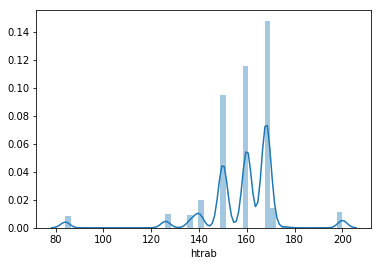

In [19]:
sns.distplot(df.htrab)

# AREA_GESTIONAL

##### En las regiones inextistentes ponemos la region que corresponde

In [20]:
df["AREA_GESTIONAL"]= df.apply(lambda x: x['AREA_GESTIONAL'].replace('NORTE', str(x['REGION_GESTIONAL'])), axis=1)
df["AREA_GESTIONAL"]= df.apply(lambda x: x['AREA_GESTIONAL'].replace('SUR', str(x['REGION_GESTIONAL'])), axis=1)

In [21]:
df.head(3)

,REGION_GESTIONAL,BAJA_NUM,AREA_DE_NEGOCIO,AREA_GESTIONAL,AREA DE NEGOCIO 2,Id_Soc,Posición,Categ,Repr_Gremial,REPRE_GREMIAL II,Clase_de_Contrato,Mes,Año,Fecha_Antig,Antig_Recon,Fecha_Nacim,edad,sexo,Unidad_Organizativa,ENCUADRE,GENERACIÓN,GENERACION_O,GRUPO JERARQUICO,GRUPO JERARQUICO_O,nacionalidad,estado_civil,puesto_sindical,htrab,Gr.prof,gerencia_operativa,PAIS_SOC,DIRECCION,EMPLEADO CON HIJOS Q,COMPA RATIO BAJAS,COMPA RATIO,COMPA RATIO ABD,TIPO BAJA,PERFIL DIGITAL,Función,Categoría del puesto,Agrupador Categorá del puesto,Grupo de personal,Horas laborables semanales,Superior directo_legajo,Superior directo_q reportes,Home_Partido,Home_Provincia,Home_Pais,Laboral_Localidad,Laboral_Provincia,Laboral_Pais,Tipo de estructura,COLABORADORES,LIDERES,nivel_estudios_alcanzado,mensajes_yammer,hijos_menos_cinco,hijos_entre_seis_diez,hijos_entre_once_quince,hijos_entre_dieciseis_veinte,hijos_mas_veinte
0,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Atención Presencial Atención Comercial,PC,Dentro de convenio,FATEL,Regular,6,2020,"2001-02-16 00:00:00,000",19.0,"1974-12-05 00:00:00,000",45.0,Femenino,ROSARIO ROCA 2,DENTRO DE CONVENIO,Generación X,2,COLABORADOR,1,argentina,divorciado/a,NaN,84.0,SITR. M,Region Litoral,ARGENTINA,COO,1.0,NaN,NaN,NaN,NaN,NaN,Atención Presencial,Atención Comercial,Ventas y Atención al Cliente,CONTRIBUIDOR INDIVIDUAL,20.0,527639.0,11,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fé,Argentina,Area de Negocio,1,0,3.0,3,1,0,0,0,0
1,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Supervisor/a ROSARIO ROCA 3,F5,Dentro de convenio,FOPSSTA,Regular,6,2020,"2003-11-01 00:00:00,000",16.0,"1978-07-17 00:00:00,000",41.0,Femenino,ROSARIO ROCA 3,DENTRO DE CONVENIO,Generación X,2,GESTIÓN,2,argentina,casado/a,NaN,160.0,FOPST. M,Region Litoral,ARGENTINA,COO,2.0,NaN,NaN,NaN,NaN,NaN,Supervisor/a,Estructura Operativa,Estructura Operativa,LIDER DE EQUIPO,40.0,201122.0,6,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fé,Argentina,Area de Negocio,0,1,3.0,1,0,2,0,0,2
2,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Atención Presencial de Ventas,NC,Dentro de convenio,FATEL,Regular,6,2020,"2001-08-01 00:00:00,000",18.0,"1973-02-15 00:00:00,000",47.0,Femenino,ROSARIO ROCA 3,DENTRO DE CONVENIO,Generación X,2,COLABORADOR,1,argentina,soltero/a,NaN,84.0,SITR. M,Region Litoral,ARGENTINA,COO,2.0,NaN,NaN,NaN,NaN,NaN,Atención Presencial,Ventas,Ventas y Atención al Cliente,CONTRIBUIDOR INDIVIDUAL,20.0,193030.0,10,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fe,Argentina,Area de Negocio,1,0,2.0,0,0,1,1,0,1


# PUESTO SINDICAL

Completamos los nulos con “Sin puesto”

In [25]:
df['puesto_sindical'].isnull().sum()

23249

In [46]:
df['puesto_sindical_ok'] = df['puesto_sindical'].fillna('Sin puesto')
df['puesto_sindical_ok'].isnull().sum()

0

In [49]:
df['puesto_sindical_ok'].unique()

array(['Sin puesto', 'Candidato no Electo', 'Vocal Titular',
       'Delegado Personal', 'Congresal Suplente', 'Delegado Edificio',
       'Revisor Cuentas Titular', 'Vocal suplente', 'Delegado Paritario',
       'Secretario Administrativo', 'Secretario/a Prensa y Difusión',
       'Delegado Congresal Titular', 'Secretario de Actas',
       'Secretario de Asuntos Gremial', 'Delegado Titular a la C.G.T.'],
      dtype=object)

# TIPO BAJA

In [47]:
df['TIPO BAJA'].isnull().sum()

22861

In [51]:
df['TIPO BAJA OK'] = df['TIPO BAJA'].fillna('ACTIVO')
df['TIPO BAJA OK'].isnull().sum()

0

In [52]:
df['TIPO BAJA OK'].unique()

array(['ACTIVO', 'NO VOLUNTARIO', 'VOLUNTARIO'], dtype=object)

# PERFIL DIGITAL

In [54]:
df['PERFIL DIGITAL'].isnull().sum()

22504

In [55]:
df['PERFIL DIGITAL OK'] = df['PERFIL DIGITAL'].fillna('SIN PERFIL DIGITAL')
df['PERFIL DIGITAL OK'].isnull().sum()

0

In [56]:
df['PERFIL DIGITAL OK'].unique()

array(['SIN PERFIL DIGITAL', 'PERFIL DIGITAL'], dtype=object)

# COMPA RATIO ABD

In [58]:
df['COMPA RATIO ABD'].isnull().sum()

17705

In [59]:
df['COMPA RATIO ABD OK'] = df['COMPA RATIO ABD'].fillna(100)
df['COMPA RATIO ABD OK'].isnull().sum()

0

In [64]:
df['COMPA RATIO ABD OK'].unique()

array([100.,  98., 102., 111.,  91.,  88.,  93.,  92.,  94.,  85.,  99.,
        79.,  95.,  75.,  68.,  96., 123.,  90., 109.,  83., 135., 131.,
        86., 126.,  80., 117., 107., 143., 130.,  58.,  89., 120., 125.,
       124., 144., 122., 114.,  84., 104., 140., 134., 101., 119., 121.,
        74., 112., 116.,  69.,  87., 141.,  78., 167., 108., 105., 110.,
       115.,  97.,  77., 142.,  81.,  73., 155., 136., 129., 113., 106.,
       149., 137.,  82.,  70., 103.,  71.,  76., 118.,  72.,  66.,  59.,
        56.,  61., 127.,  65.,  67., 133., 166., 150., 139., 128., 147.,
       152., 164., 132., 138., 146.,  53., 154., 163., 161., 145., 157.,
        63.,  51., 158., 190., 208., 175., 148.,  64., 153., 173., 181.,
       179., 213., 165.,  49., 180.,  62.,  54.,  46., 211.,  60., 156.,
       159., 177., 433., 473.,  11., 199., 185., 168., 169., 218., 195.,
       160., 151., 174., 162., 184.,  20., 178., 210.,  57.,  55.,  48.,
       171.])

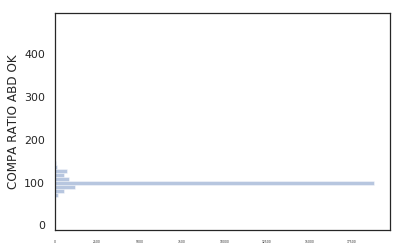

In [75]:
sns.distplot(df['COMPA RATIO ABD OK'], kde = 0, vertical =True )

# ELIMINAMOS LAS COLUMNAS QUE NO NOS IMPORTAN

In [ ]:
df = df.drop(['AREA DE NEGOCIO 2', 'Clase_de_Contrato', 'GENERACIÓN', 'GRUPO JERARQUICO', 'EMPLEADO CON HIJOS Q',\
             'COMPA RATIO BAJAS', 'COMPA RATIO', 'Horas laborables semanales', 'Home_Partido'], axis = 1)

In [ ]:
# Revisiar colinealidad (matriz de correlacion)
# Revisar existencia de outliers
# Estadistica descriptiva
# Dummies
# Standard scaler
# Solucionar desbalanceo
# Feature importance
# Implementar modelos
